In [ ]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx
from PIL import Image

In [2]:
fname = 'lena.png'
greyscale_image = Image.open(fname).convert("L")
arr = np.asarray(greyscale_image)

In [3]:
def compressive_sampling(y: np.ndarray, sample_percentage: float, verbose: bool = False):
    n = len(y)
    
    # sampling
    m = arr.shape[0] * sample_percentage // 100
    ri = np.random.choice(n, m, replace=False)
    ri.sort()

    y_sampled = y[ri]

    A = spfft.idct(np.identity(n), norm='ortho', axis=0)
    A = A[ri]

    # L1 optimization
    vx = cvx.Variable(n)
    objective = cvx.Minimize(cvx.norm(vx, 1))
    constraints = [A @ vx == y_sampled]
    prob = cvx.Problem(objective, constraints)
    result = prob.solve(verbose=verbose)
    
    # reconstruct signal
    x = np.array(vx.value)
    x = np.squeeze(x)
    sig = spfft.idct(x, norm='ortho', axis=0)

    return x, sig

In [4]:
# parameters
N = arr.shape[0]
sample_percentages = [10, 20, 30, 40, 50]
sparsity_threshold = 1e-3
errors = np.zeros((N, len(sample_percentages)))
sparsities = np.zeros((N, len(sample_percentages)))
reconstructed_image = np.zeros((N, N, len(sample_percentages)))

In [5]:
# using Rows
for i in range(arr.shape[0]):
    for j in range(len(sample_percentages)):
        x, sig = compressive_sampling(arr[i], sample_percentages[j], verbose=False)
        reconstructed_image[i, :, j] = sig

        # error
        err = ((arr[i] - sig)**2).mean()

        # sparsity
        sparsity = np.count_nonzero(x > sparsity_threshold)
        m = arr.shape[0] * sample_percentages[j] // 100 #

        # print(f'Row: {i}, Samples : {m}, Error: {err}, Sparsity: {sparsity}')
        errors[i, j] = err
        sparsities[i, j] = sparsity

In [6]:
np.save(os.path.join(os.getcwd(), 'results', 'reconstructed_image_rows.npy'), reconstructed_image)
np.save(os.path.join(os.getcwd(), 'results', 'errors_rows.npy'), errors)
np.save(os.path.join(os.getcwd(), 'results', 'sparsities_rows.npy'), sparsities)

In [4]:
reconstructed_image = np.load(os.path.join(os.getcwd(), 'results', 'reconstructed_image_rows.npy'))
errors = np.load(os.path.join(os.getcwd(), 'results', 'errors_rows.npy'))
sparsities = np.load(os.path.join(os.getcwd(), 'results', 'sparsities_rows.npy'))

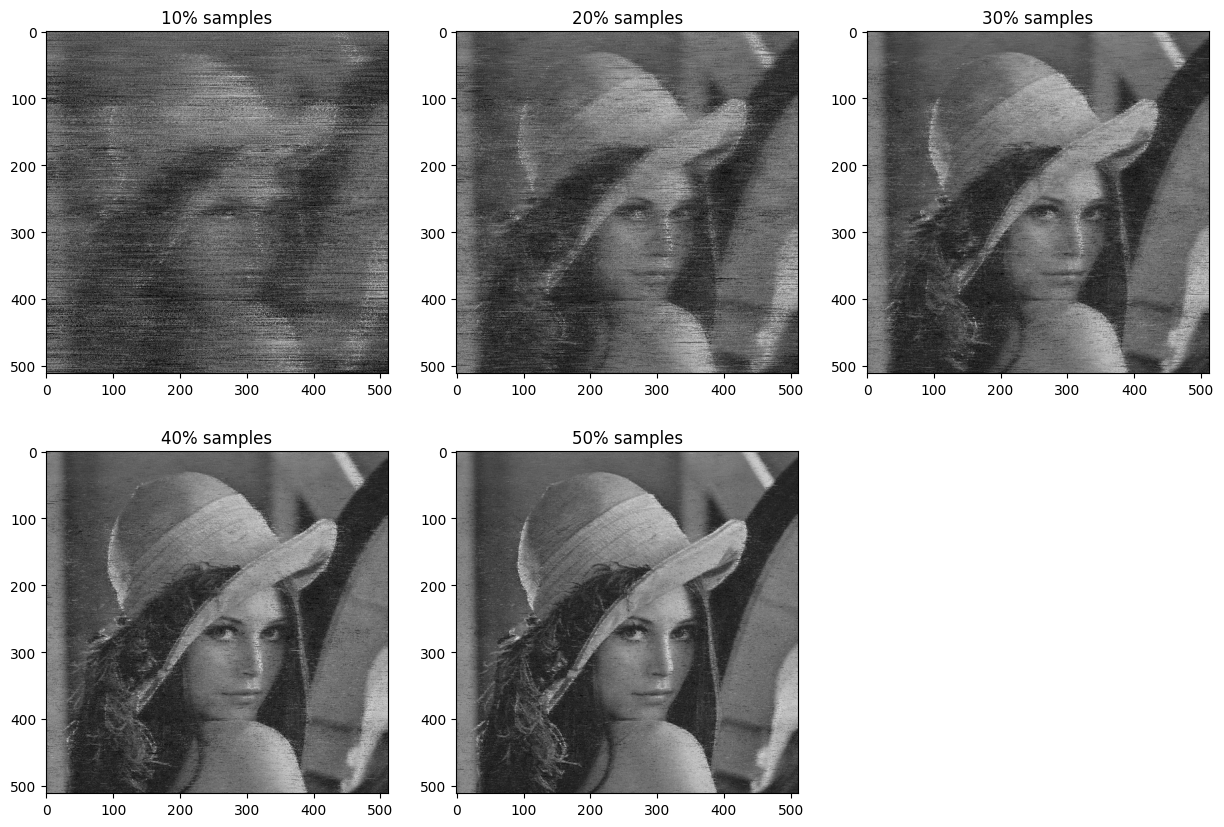

In [7]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(reconstructed_image[:, :, 0], cmap='gray', vmin=0, vmax=255)
plt.title(f'10% samples')
plt.subplot(2, 3, 2)
plt.imshow(reconstructed_image[:, :, 1], cmap='gray', vmin=0, vmax=255)
plt.title(f'20% samples')
plt.subplot(2, 3, 3)
plt.imshow(reconstructed_image[:, :, 2], cmap='gray', vmin=0, vmax=255)
plt.title(f'30% samples')
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_image[:, :, 3], cmap='gray', vmin=0, vmax=255)
plt.title(f'40% samples')
plt.subplot(2, 3, 5)
plt.imshow(reconstructed_image[:, :, 4], cmap='gray', vmin=0, vmax=255)
plt.title(f'50% samples')
plt.show()

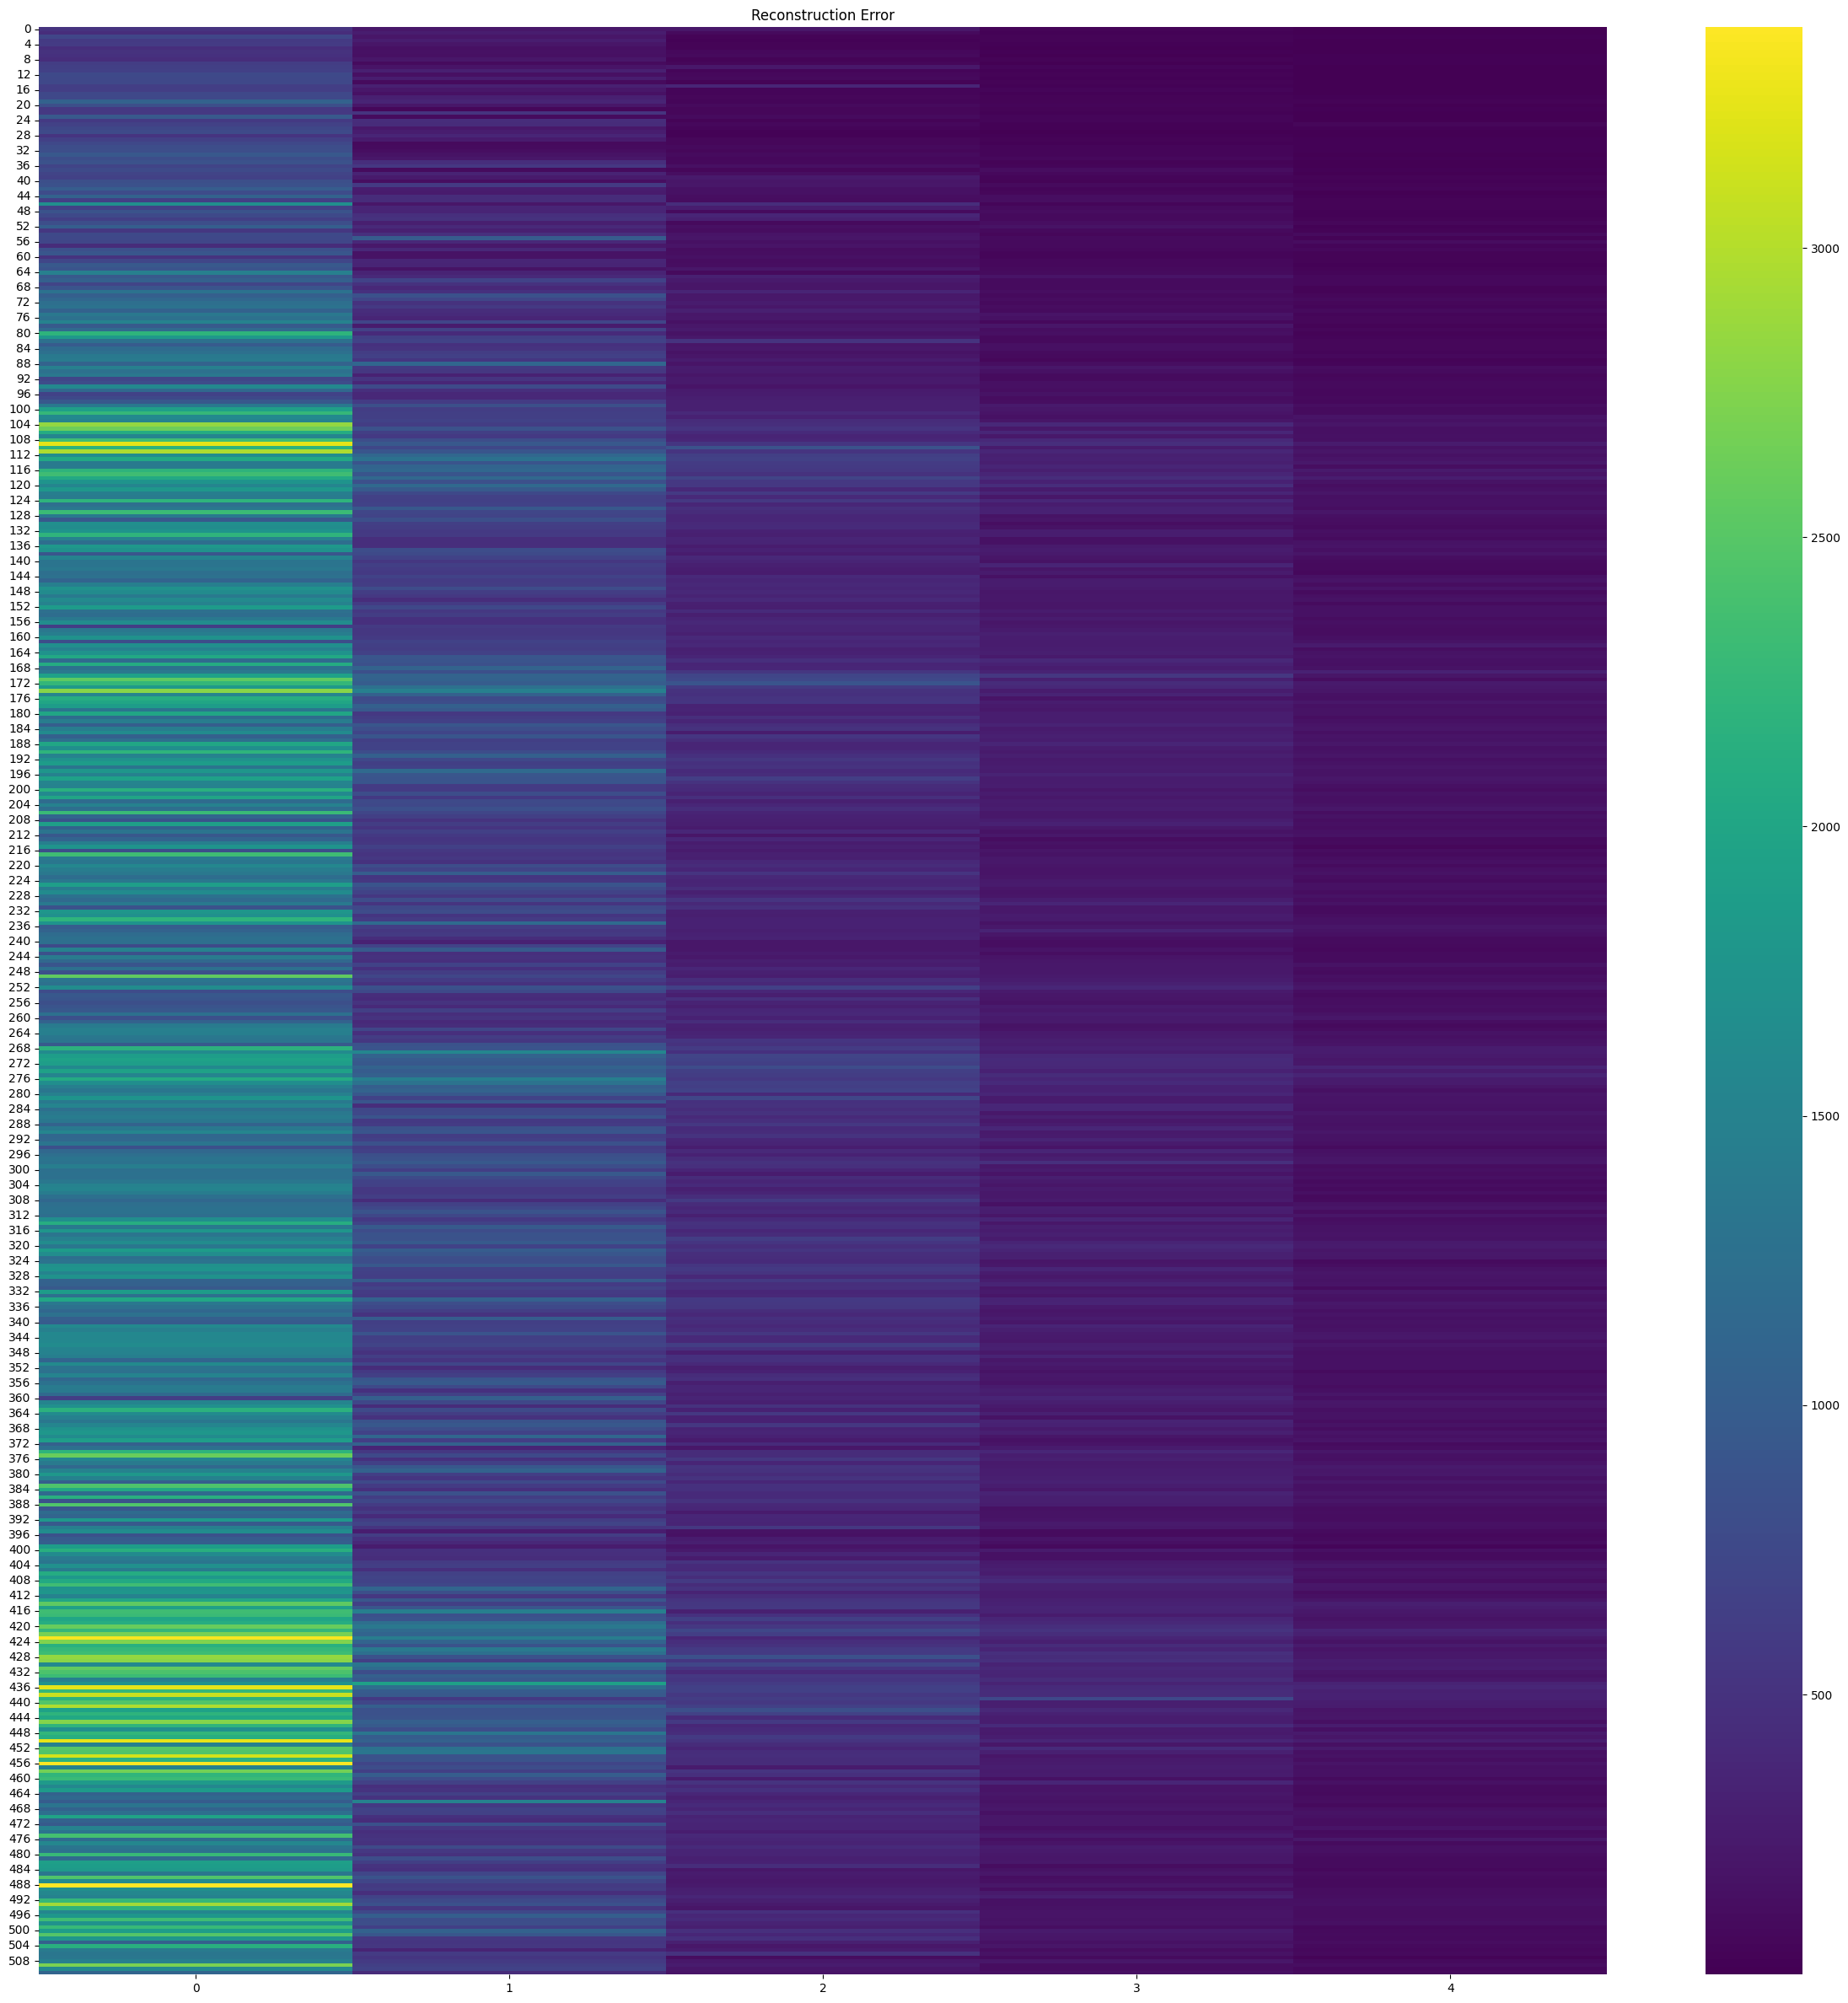

In [8]:
plt.figure(figsize=(30, 30))
plt.xlabel('Image Row')
plt.ylabel('Sample Percentage')
plt.title('Reconstruction Error')
sns.heatmap(errors, annot=False, fmt=".2f", cmap='viridis')
plt.show()

In [20]:
print(np.mean(sparsities, axis=0))

[ 26.69726562  52.28515625  77.4921875  102.56835938 128.52539062]


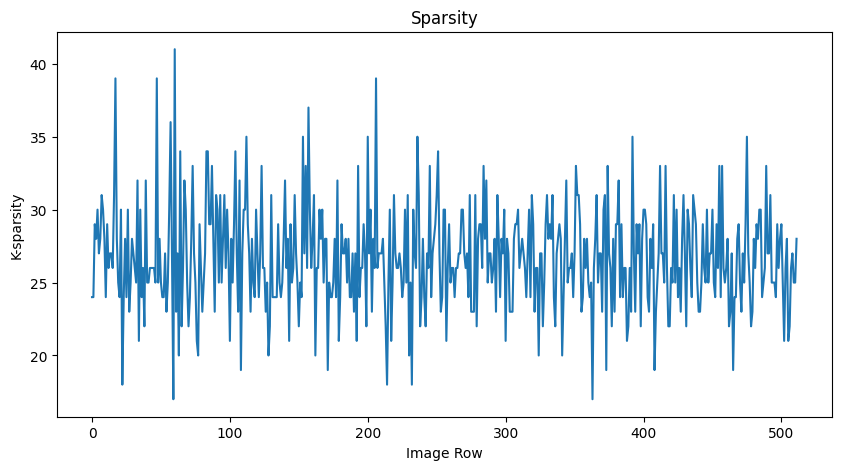

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities[:, 0], label='10% samples')
plt.show()

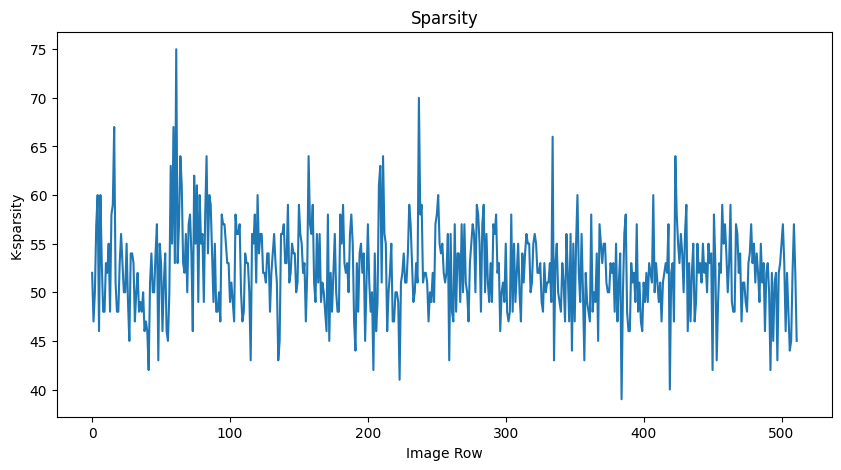

In [12]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities[:, 1], label='10% samples')
plt.show()

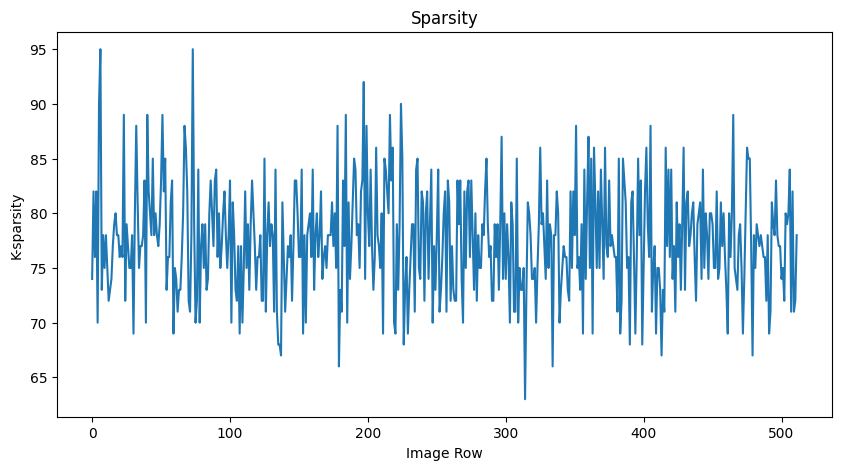

In [13]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities[:, 2], label='10% samples')
plt.show()

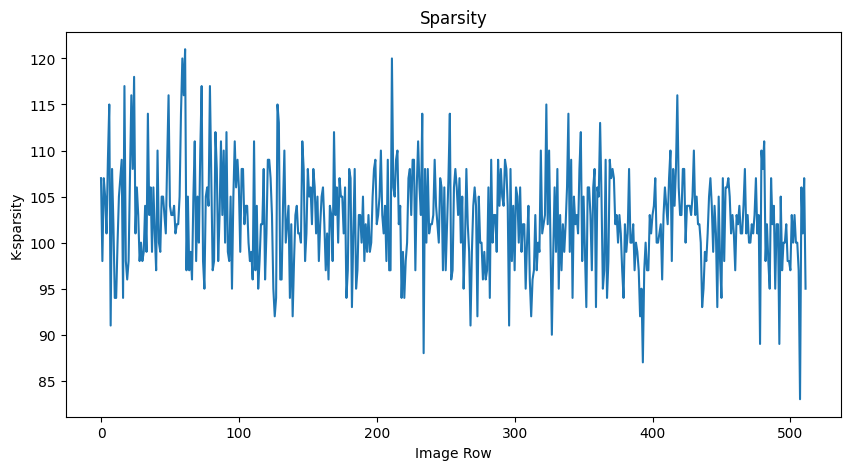

In [14]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities[:, 3], label='10% samples')
plt.show()

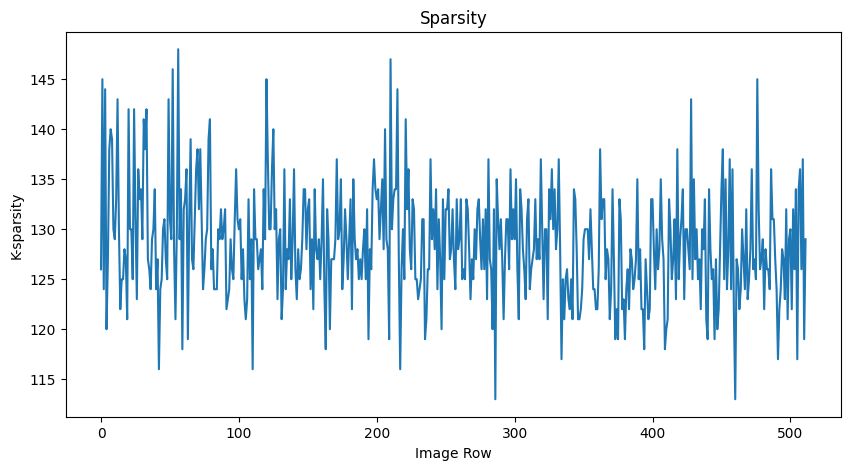

In [15]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities[:, 4], label='10% samples')
plt.show()

In [16]:
# parameters
N = arr.shape[1]
sample_percentages = [10, 20, 30, 40, 50]
sparsity_threshold = 1e-3
errors_columns = np.zeros((N, len(sample_percentages)))
sparsities_columns = np.zeros((N, len(sample_percentages)))
reconstructed_image_columns = np.zeros((N, N, len(sample_percentages)))

In [17]:
# using columns
for i in range(arr.shape[1]):
    for j in range(len(sample_percentages)):
        x, sig = compressive_sampling(arr[:, i], sample_percentages[j], verbose=False)
        reconstructed_image_columns[:, i, j] = sig
        
        # error
        err = ((arr[:, i] - sig)**2).mean()
        
        # sparsity
        sparsity = np.count_nonzero(x > sparsity_threshold)
        m = arr.shape[1] * sample_percentages[j] // 100 #
        # print(f'Row: {i}, Samples : {m}, Error: {err}, Sparsity: {sparsity}')
        errors_columns[i, j] = err
        sparsities_columns[i, j] = sparsity

In [18]:
np.save(os.path.join(os.getcwd(), 'results', 'reconstructed_image_columns.npy'), reconstructed_image_columns)
np.save(os.path.join(os.getcwd(), 'results', 'errors_columns.npy'), errors_columns)
np.save(os.path.join(os.getcwd(), 'results', 'sparsities_columns.npy'), sparsities_columns)

In [ ]:
reconstructed_image_columns = np.load(os.path.join(os.getcwd(), 'results', 'reconstructed_image_columns.npy'))
errors_columns = np.load(os.path.join(os.getcwd(), 'results', 'errors_columns.npy'))
sparsities_columns = np.load(os.path.join(os.getcwd(), 'results', 'sparsities_columns.npy'))

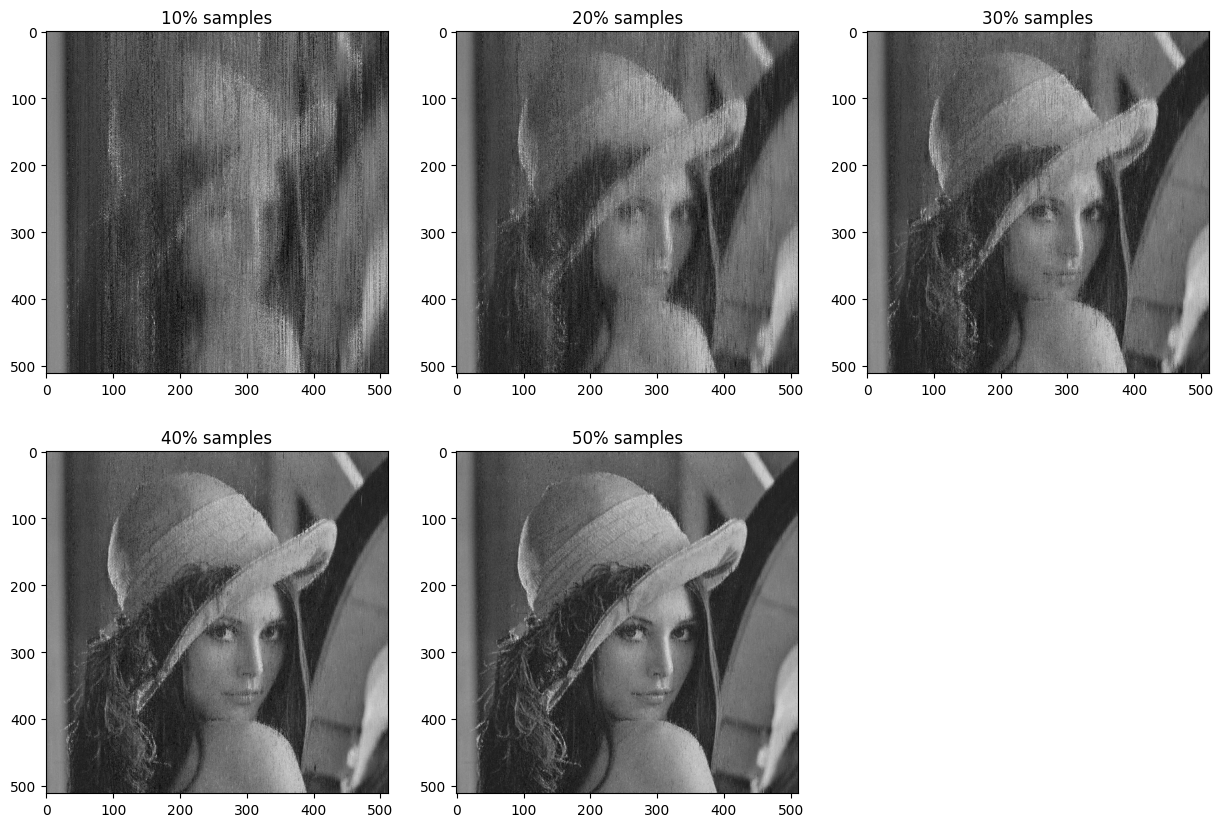

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(reconstructed_image_columns[:, :, 0], cmap='gray', vmin=0, vmax=255)
plt.title(f'10% samples')
plt.subplot(2, 3, 2)
plt.imshow(reconstructed_image_columns[:, :, 1], cmap='gray', vmin=0, vmax=255)
plt.title(f'20% samples')
plt.subplot(2, 3, 3)
plt.imshow(reconstructed_image_columns[:, :, 2], cmap='gray', vmin=0, vmax=255)
plt.title(f'30% samples')
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_image_columns[:, :, 3], cmap='gray', vmin=0, vmax=255)
plt.title(f'40% samples')
plt.subplot(2, 3, 5)
plt.imshow(reconstructed_image_columns[:, :, 4], cmap='gray', vmin=0, vmax=255)
plt.title(f'50% samples')
plt.show()

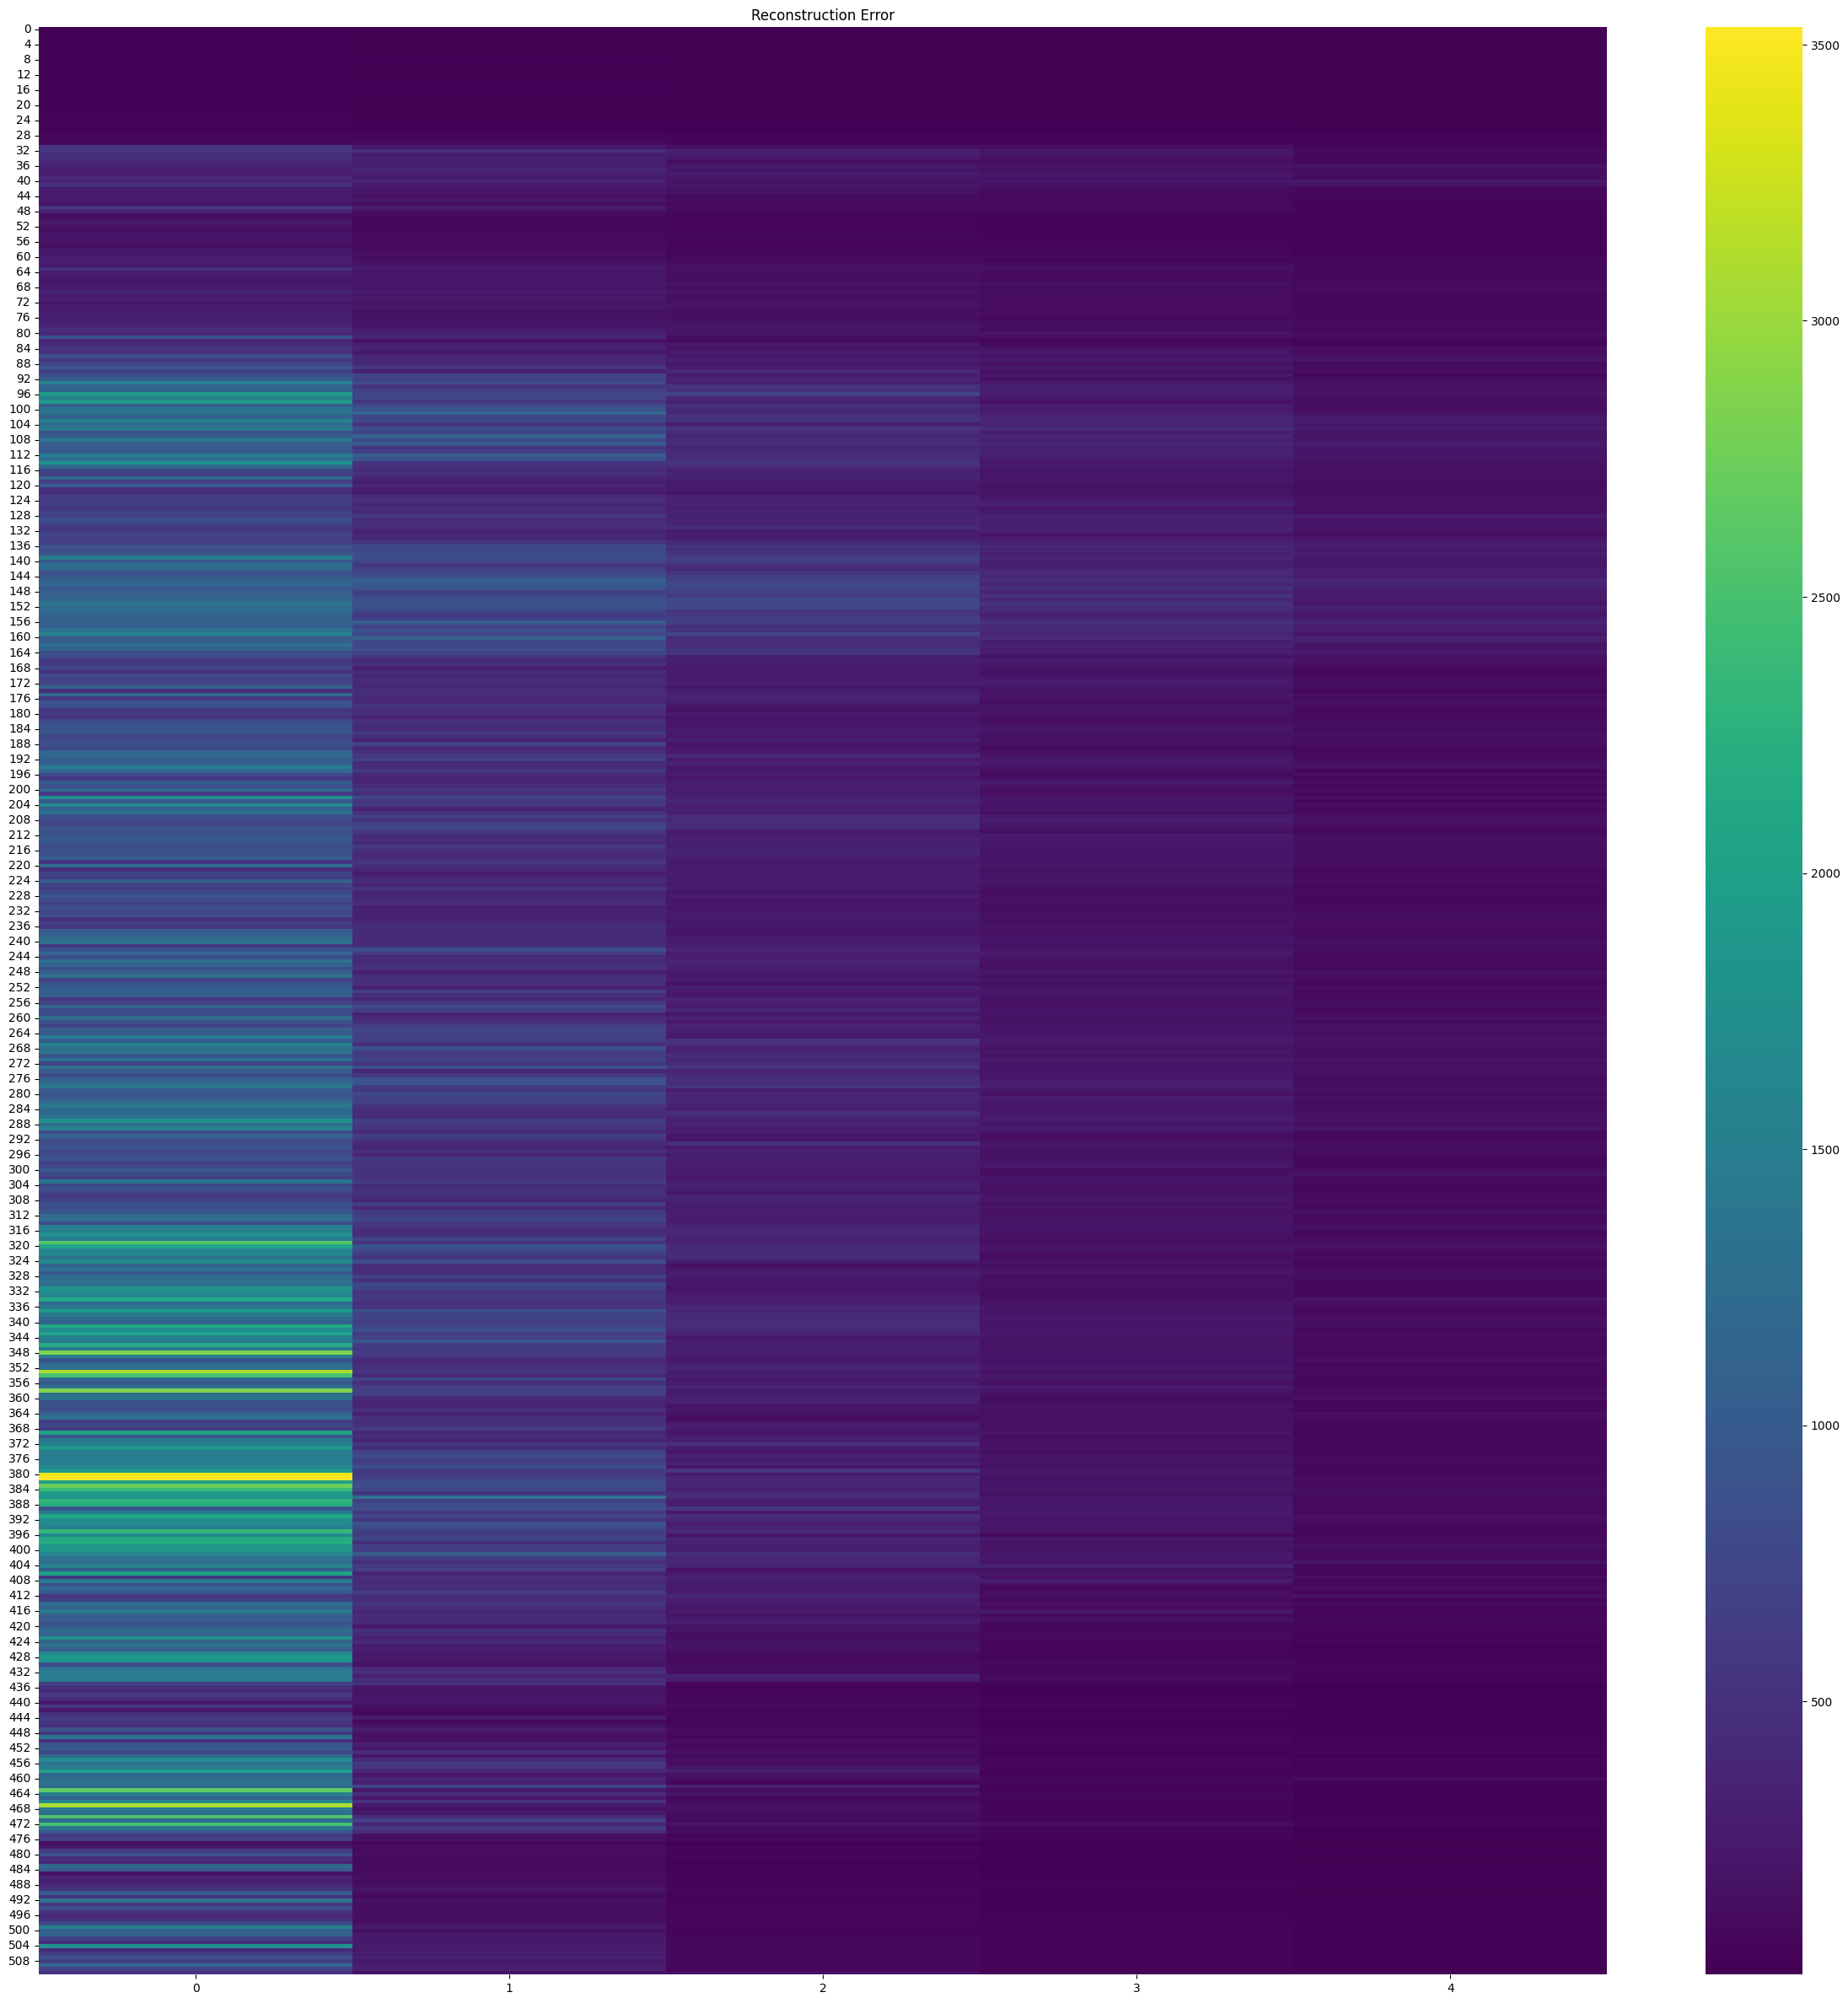

In [23]:
plt.figure(figsize=(30, 30))
plt.xlabel('Image Row')
plt.ylabel('Sample Percentage')
plt.title('Reconstruction Error')
sns.heatmap(errors_columns, annot=False, fmt=".2f", cmap='viridis')
plt.show()

In [21]:
print(np.mean(sparsities_columns, axis=0))

[ 26.171875    51.93945312  77.79101562 102.78320312 128.890625  ]


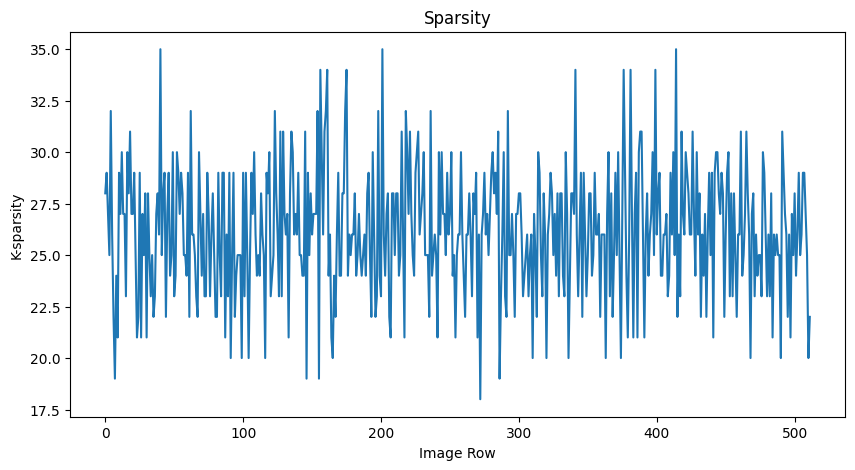

In [24]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities_columns[:, 0], label='10% samples')
plt.show()

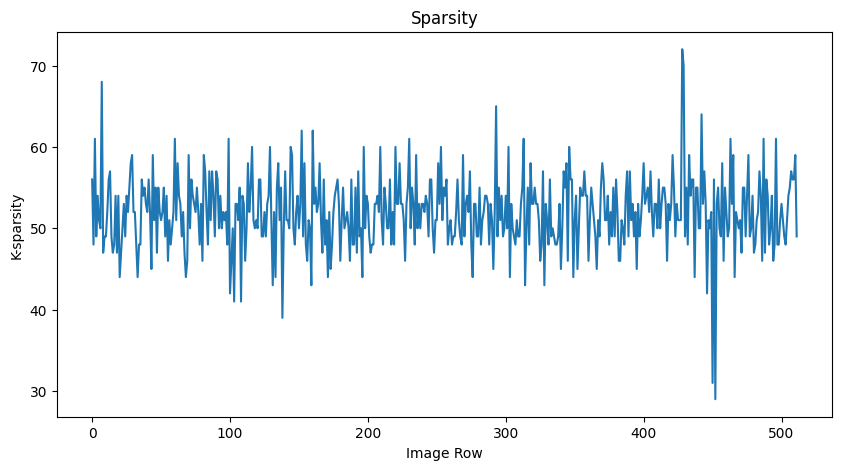

In [25]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities_columns[:, 1], label='10% samples')
plt.show()

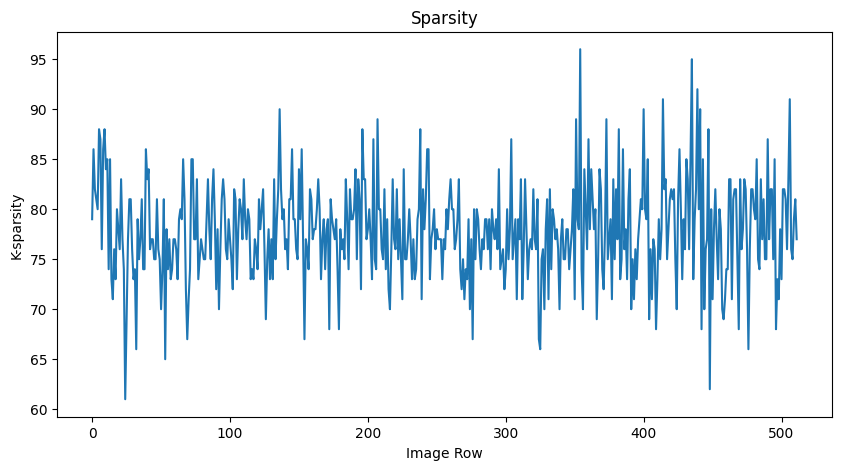

In [26]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities_columns[:, 2], label='10% samples')
plt.show()

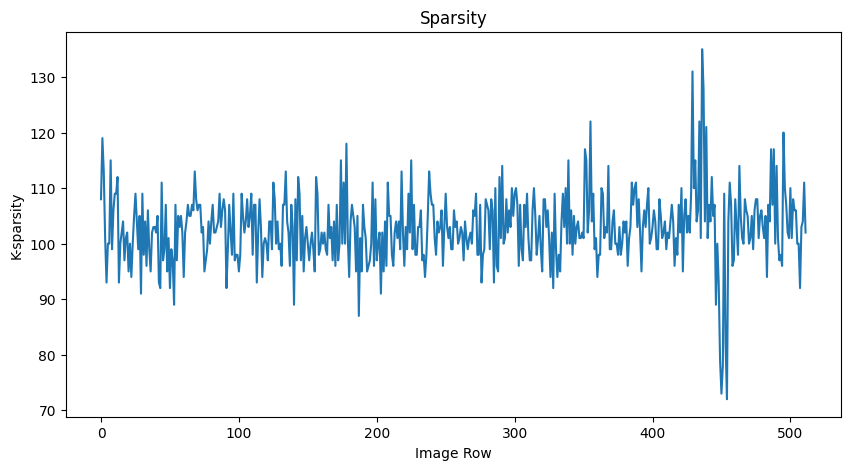

In [27]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities_columns[:, 3], label='10% samples')
plt.show()

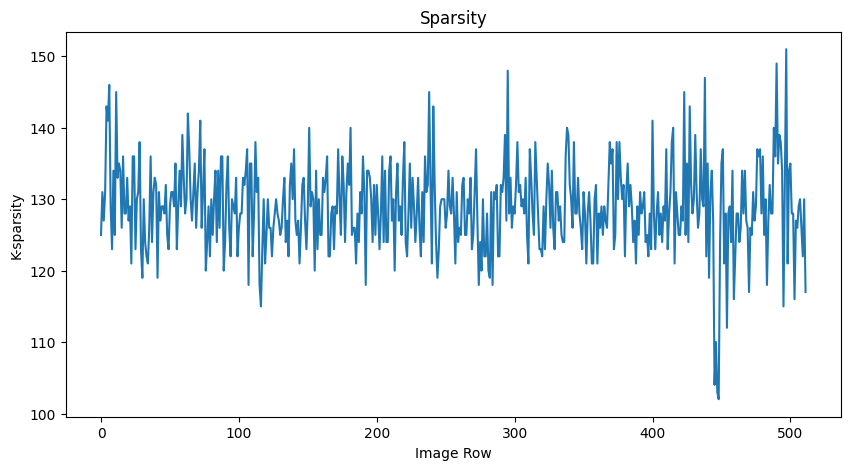

In [28]:
plt.figure(figsize=(10, 5))
plt.ylabel('K-sparsity')
plt.xlabel('Image Row')
plt.title('Sparsity')
plt.plot(sparsities_columns[:, 4], label='10% samples')
plt.show()